In [1]:
import os
import sys
import yaml

import re
import numpy
from PIL import Image, ImageDraw
from io import BytesIO

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def get_all_labels(input_yaml, riib=False):
    """ Gets all labels within label file
    Note that RGB images are 1280x720 and RIIB images are 1280x736.
    :param input_yaml: Path to yaml file
    :param riib: If True, change path to labeled pictures
    :return: images: Labels for traffic lights
    """
    images = yaml.load(open(input_yaml, 'rb').read())

    for i in range(len(images)):
        images[i]['path'] = os.path.abspath(os.path.join(os.path.dirname(input_yaml), images[i]['path']))
        if riib:
            images[i]['path'] = images[i]['path'].replace('.png', '.pgm')
            images[i]['path'] = images[i]['path'].replace('rgb/train', 'riib/train')
            images[i]['path'] = images[i]['path'].replace('rgb/test', 'riib/test')
            for box in images[i]['boxes']:
                box['y_max'] = box['y_max'] + 8
                box['y_min'] = box['y_min'] + 8
    return images

In [3]:
input_yaml = '/home/bruno/Documents/eLearning/udacity/CarND/t3/CarND-Capstone/data/bosch/original_train.yaml'

In [4]:
all_imgs = get_all_labels(input_yaml)

In [5]:
all_imgs[10]

{'boxes': [{'label': 'RedLeft',
   'occluded': False,
   'x_max': 630.0,
   'x_min': 625.125,
   'y_max': 366.875,
   'y_min': 358.125},
  {'label': 'Red',
   'occluded': False,
   'x_max': 657.25,
   'x_min': 651.875,
   'y_max': 355.25,
   'y_min': 345.125},
  {'label': 'Red',
   'occluded': False,
   'x_max': 679.75,
   'x_min': 675.375,
   'y_max': 366.875,
   'y_min': 357.375}],
 'path': '/home/bruno/Documents/eLearning/udacity/CarND/t3/CarND-Capstone/data/bosch/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/207544.png'}

In [6]:
im_test = Image.open(all_imgs[10]['path'])

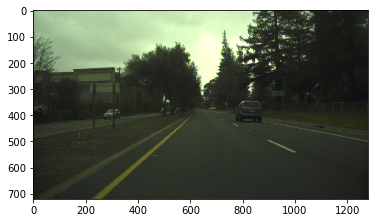

In [7]:
plt.imshow(im_test)

In [8]:
def ir(some_value):
    """Int-round function for short array indexing """
    return int(round(some_value))

def show_label_images(input_yaml, output_folder=None):
    """
    Shows and draws pictures with labeled traffic lights.
    Can save pictures.
    :param input_yaml: Path to yaml file
    :param output_folder: If None, do not save picture. Else enter path to folder
    """
    images = get_all_labels(input_yaml)

    annotated_images = []
    

    if output_folder is not None:
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

    for i, image_dict in enumerate(images):
        img = Image.open(image_dict['path'])
        draw = ImageDraw.Draw(img)
        byte_io = BytesIO()

        for box in image_dict['boxes']:
            draw.rectangle([ir(box['x_min']), ir(box['y_min']),
                           ir(box['x_max']), ir(box['y_max'])], outline='red')

        if output_folder is not None:
            #cv2.imwrite(os.path.join(output_folder, str(i).zfill(10) + '_'
            #            + os.path.basename(image_dict['path'])), image)
            pass

        img.save(byte_io, "PNG")

        byte_io.seek(0)
        new_im = Image.open(byte_io)

        annotated_images.append(new_im)
        #del draw
                           
    return annotated_images

In [9]:
testing_yaml = '/home/bruno/Documents/eLearning/udacity/CarND/t3/CarND-Capstone/data/bosch/temporary.yaml'

In [10]:
test_imgs = show_label_images(testing_yaml)

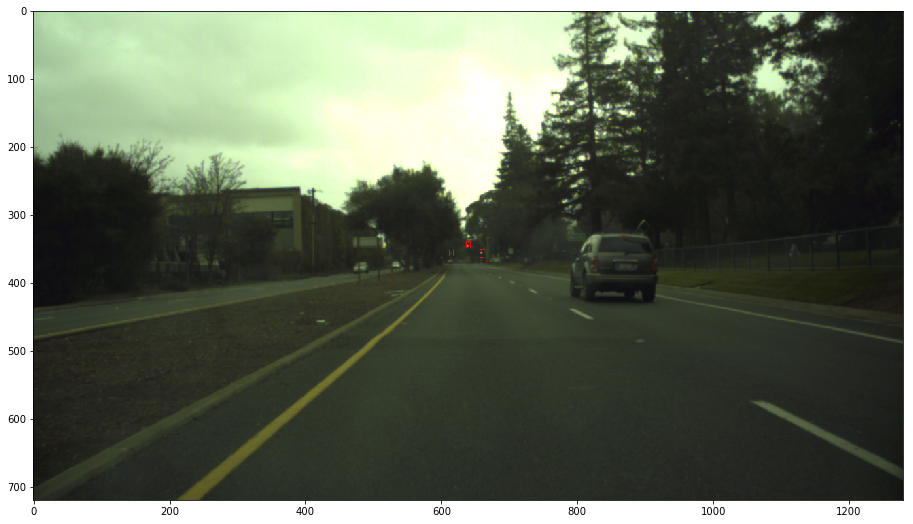

In [11]:
plot= plt.figure(figsize=(1280/80, 720/80.))
plt.imshow(test_imgs[5])

## Labels

In [19]:
label_dict = {}
counter = 1
for img in all_imgs:
    if len(img['boxes']) > 0:
        for box in img['boxes']:
            if box['label'] not in label_dict:
                    label_dict[box['label']] = counter
                    counter += 1

In [23]:
label_dict

{'Green': 5,
 'GreenLeft': 4,
 'GreenRight': 7,
 'GreenStraight': 8,
 'GreenStraightLeft': 13,
 'GreenStraightRight': 9,
 'Red': 3,
 'RedLeft': 2,
 'RedRight': 10,
 'RedStraight': 11,
 'RedStraightLeft': 12,
 'Yellow': 1,
 'off': 6}

## Splitting into training and validation

In [56]:
original_yaml = '/home/bruno/Documents/eLearning/udacity/CarND/t3/CarND-Capstone/data/bosch/original_train.yaml'
trn_yaml = '/home/bruno/Documents/eLearning/udacity/CarND/t3/CarND-Capstone/data/bosch/train.yaml'
val_yaml = '/home/bruno/Documents/eLearning/udacity/CarND/t3/CarND-Capstone/data/bosch/validation.yaml'
tst_yaml = '/home/bruno/Documents/eLearning/udacity/CarND/t3/CarND-Capstone/data/bosch/test.yaml'

In [57]:
all_imgs = get_all_labels(original_yaml)
trn_imgs = get_all_labels(trn_yaml)
val_imgs = get_all_labels(val_yaml)
tst_imgs = get_all_labels(tst_yaml)

In [67]:
assert((len(val_imgs) + len(trn_imgs) + len(tst_imgs) == len(all_imgs)))

print("Training size:   {:.2f}% of the dataset".format(100 * len(trn_imgs)/len(all_imgs)))
print("Validation size: {:.2f}% of the dataset".format(100 * len(val_imgs)/len(all_imgs)))
print("Test size:        {:.2f}% of the dataset".format(100 * len(tst_imgs)/len(all_imgs)))

Training size:   83.02% of the dataset
Validation size: 10.17% of the dataset
Test size:        6.81% of the dataset


In [54]:
trn_imgs[0]

{'boxes': [],
 'path': '/home/bruno/Documents/eLearning/udacity/CarND/t3/CarND-Capstone/data/bosch/rgb/train/2015-10-05-10-52-01_bag/23646.png'}

In [60]:
val_imgs[0]

{'boxes': [],
 'path': '/home/bruno/Documents/eLearning/udacity/CarND/t3/CarND-Capstone/data/bosch/rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/207374.png'}

In [61]:
tst_imgs[0]

{'boxes': [],
 'path': '/home/bruno/Documents/eLearning/udacity/CarND/t3/CarND-Capstone/data/bosch/rgb/train/2015-05-29-15-29-39_arastradero_traffic_light_loop_bag/7514.png'}